# `Creating Classification Models using Keras & TensorFlow`
----
1. Use <code>categorical_crossentropy</code> as loss function for multi-class classification (Example Dataset : iris.csv,MNIST.csv...etc)

2. Use <code>binary_crossentropy</code> as loss function for binary classification(Example Dataset : Pima_indians_diabtes.csv,Titanic.csv...etc
    - Similar to log loss: **Lower is better**
3. Add <code>metrics = ['accuracy']</code> to compile step for easy-to-understand diagnostics
4. Output layer should has separate node for each possible outcome

## Scenerio: Predict survival on the Titanic disaster
1. Modelling with a dataset "Titanic" for a classification problem
    - You will use predictors/inputs such as 
        - age
        - fare
        - embarked
        - .. etc to predict who will survive.
    - [Refer more information from kaggle](https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook)


### Import required modules

In [1]:
import pandas as pd
from keras.utils import to_categorical

# define Architecture
from keras.models import Sequential
from keras.layers import Dense

# for Model Vizulization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


### Import the train and test data from different csv files

#### Load Train Data

In [2]:
# Read Training data
df = pd.read_csv("titanic_all_numeric_train.csv")

####  Separate X_train and y_train
# create X_train and creat 2d numpy array
X_train = df.drop(['survived'], axis=1).values

# create y_train and creat 2d numpy array
y_train = to_categorical(df.survived)

In [3]:
# Save the number of input columns: n_cols
n_cols = X_train.shape[1]
n_cols

10

#### Load Test Data

In [4]:
df = pd.read_csv("titanic_all_numeric_test.csv")

# create X_test and creat 2d numpy array
X_test = df.drop(['survived'], axis=1).values

# create y_test and creat 2d numpy array
y_test= to_categorical(df.survived)

### Define Architecture of the model

In [5]:
# Set up the model
model = Sequential()

# Add the first hidden layer and input layer
model.add(Dense(32,activation='relu',
                input_shape=(n_cols,),
                name="Input_1stHiddenlayer"))

# Add the output layer
model.add(Dense(2,activation='softmax',
                name ="output_layer"))

W0221 10:35:21.360306 14040 deprecation_wrapper.py:119] From C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0221 10:35:21.392578 14040 deprecation_wrapper.py:119] From C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0221 10:35:21.401208 14040 deprecation_wrapper.py:119] From C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



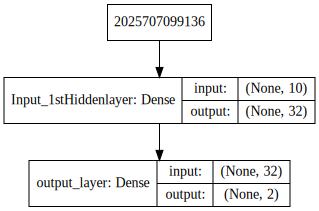

In [6]:
SVG(model_to_dot(model,show_shapes=True, show_layer_names=True,).create(prog='dot', format='svg'))

### Compile the model

In [7]:
# Compile the model
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

W0221 10:35:22.246993 14040 deprecation_wrapper.py:119] From C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0221 10:35:22.275808 14040 deprecation_wrapper.py:119] From C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0221 10:35:22.287811 14040 deprecation.py:323] From C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fit /Train the model

In [8]:
# Fit the model
model.fit(X_train, 
          y_train,
          epochs=100)

W0221 10:35:22.669512 14040 deprecation_wrapper.py:119] From C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
891/891 [==============================] - 1s 635us/step - loss: 3.9344 - acc: 0.5623
Epoch 2/100
891/891 [==============================] - 0s 45us/step - loss: 1.1448 - acc: 0.6622
Epoch 3/100
891/891 [==============================] - 0s 44us/step - loss: 0.8139 - acc: 0.6296
Epoch 4/100
891/891 [==============================] - 0s 48us/step - loss: 0.6227 - acc: 0.6723
Epoch 5/100
891/891 [==============================] - 0s 60us/step - loss: 0.6198 - acc: 0.6801
Epoch 6/100
891/891 [==============================] - 0s 51us/step - loss: 0.6138 - acc: 0.6835
Epoch 7/100
891/891 [==============================] - 0s 48us/step - loss: 0.5987 - acc: 0.6768
Epoch 8/100
891/891 [==============================] - 0s 47us/step - loss: 0.6108 - acc: 0.6756
Epoch 9/100
891/891 [==============================] - 0s 71us/step - loss: 0.5806 - acc: 0.7037
Epoch 10/100
891/891 [==============================] - 0s 83us/step - loss: 0.5778 - acc: 0.6947
Epoch 11/100
891/891 [======

### Using Models
- Save
- Reload
- Make predictions


#### Save the model

In [9]:
import os
os.getcwd()

'C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\03 Jupyter Notebooks\\Level 05_of_06_Deep_Learning_or_Neural_Network'

In [10]:
from keras.models import load_model
model.save('model_file.h5')

#### Reload the model

In [11]:
my_model = load_model('model_file.h5')

In [12]:
type(my_model)

keras.engine.sequential.Sequential

#### Make Predictions on new data / test data

In [13]:
# Calculate predictions: predictions
y_test_pred = my_model.predict(X_test)

In [14]:
y_test_pred[:5]

array([[0.90223515, 0.09776489],
       [0.26734272, 0.7326573 ],
       [0.635057  , 0.36494303],
       [0.32956555, 0.67043453],
       [0.8952818 , 0.10471816]], dtype=float32)

In [15]:
# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = y_test_pred[:,1]

In [16]:
# print predicted_prob_true
print(predicted_prob_true)

[0.09776489 0.7326573  0.36494303 0.67043453 0.10471816 0.2403706
 0.44842222 0.30744776 0.43521637 0.6613551  0.5458902  0.5864816
 0.14793038 0.16991432 0.40288174 0.43626675 0.31354618 0.24142921
 0.38722768 0.4406839  0.31326818 0.22988501 0.57016647 0.46584192
 0.36293206 0.33910435 0.16938348 0.76062644 0.532098   0.11436121
 0.39034858 0.7204378  0.5280745  0.06531911 0.5885541  0.45979443
 0.16945736 0.14743426 0.4217985  0.5249475  0.23419112 0.51961476
 0.1815116  0.6913231  0.5756046  0.11632831 0.27900824 0.5280745
 0.2342581 ]


In [17]:
# print predicted_prob_true
predicted_prob_true.round()

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.],
      dtype=float32)

> Please practice one example using iris dataset for Multi classes
[refer iris dataset example](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)